<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/Lab_7_Abhinav_Verma_E23CSEU1335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression -- R²: 0.7172, MAE: 3.2657
Polynomial Regression (degree=2) -- R²: 0.7089, MAE: 2.9682


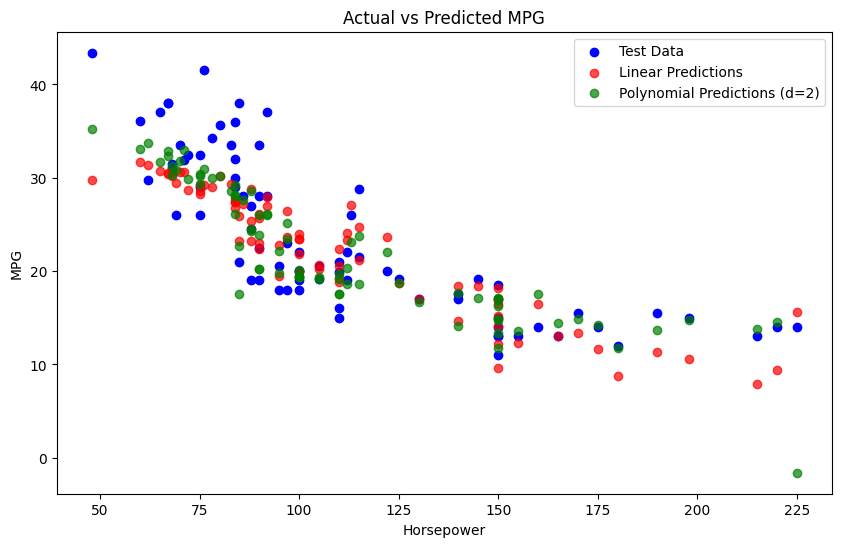


**Discussion:**

- Linear Regression provides a simple, interpretable model but may underfit if the relationship is nonlinear.
- Polynomial Regression (degree=2) often yields higher R² and lower MAE, fitting curved trends in the data better.
- Polynomial models risk overfitting if degree is too high or features too many.
- Choose polynomial regression when residual plots or domain knowledge indicate nonlinearity.



In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

# 2. Data Loading and Preprocessing
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(url)
# Drop rows with missing values (especially 'horsepower')
df = df.dropna(subset=['horsepower'])
# Select features and target
X = df[['horsepower', 'weight', 'acceleration', 'displacement', 'cylinders']]
y = df['mpg']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 5. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# 6. Evaluation Metrics
def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} -- R²: {r2:.4f}, MAE: {mae:.4f}")

print_metrics(y_test, y_pred_lin, "Linear Regression")
print_metrics(y_test, y_pred_poly, "Polynomial Regression (degree=2)")

# 7. Plotting (for visualization, let's use horsepower vs mpg)
plt.figure(figsize=(10,6))
plt.scatter(X_test['horsepower'], y_test, color='blue', label='Test Data')
plt.scatter(X_test['horsepower'], y_pred_lin, color='red', label='Linear Predictions', alpha=0.7)
plt.scatter(X_test['horsepower'], y_pred_poly, color='green', label='Polynomial Predictions (d=2)', alpha=0.7)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Actual vs Predicted MPG')
plt.show()

# 8. Discussion (print as markdown in Colab)
from IPython.display import Markdown as md
md('''
**Discussion:**

- Linear Regression provides a simple, interpretable model but may underfit if the relationship is nonlinear.
- Polynomial Regression (degree=2) often yields higher R² and lower MAE, fitting curved trends in the data better.
- Polynomial models risk overfitting if degree is too high or features too many.
- Choose polynomial regression when residual plots or domain knowledge indicate nonlinearity.

''')
